Veremos hoy como se pueden utilizar otros software de manipulacion de datos, en concreto cdo y R, desde python. Primero instalaremos dos paquetes, cdo python y r2py.

conda install -c r rpy2 
 
 
conda install -c conda-forge python-cdo 

### CDO

Climate Data Operators

CDO is a collection of command line Operators to manipulate and analyse Climate and NWP model Data.
Supported data formats are GRIB 1/2, netCDF 3/4, SERVICE, EXTRA and IEG. There are more than 600 operators available.

la documentacion se puede descargar aqui: https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=1&ved=2ahUKEwjPk-m07YzmAhUc8uAKHa9xBZQQFjAAegQIARAC&url=https%3A%2F%2Fcode.mpimet.mpg.de%2Fprojects%2Fcdo%2Fembedded%2Fcdo.pdf&usg=AOvVaw0cVe1SWyvMcBxTbUbf4p4z

CDO se puede usar desde la terminal, pero existe un paquete de python que permite utilizar lo desde python. One of the advantage is that it is easier to install.

descargamos el fichiero: http://surfobs.climate.copernicus.eu/dataaccess/access_eobs.php#datafiles

In [25]:
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn.linear_model import LinearRegression
import datetime as dt
from scipy import stats
import sys
import matplotlib.dates as dates

In [1]:
import os


def convert_bytes(num):
    """
    this function will convert bytes to MB.... GB... etc
    """
    for x in ['bytes', 'KB', 'MB', 'GB', 'TB']:
        if num < 1024.0:
            return "%3.1f %s" % (num, x)
        num /= 1024.0

def file_size(file_path):
    """
    this function will return the file size
    """
    if os.path.isfile(file_path):
        file_info = os.stat(file_path)
        return convert_bytes(file_info.st_size)

        
file = "tx_ens_mean_0-.25deg_reg_v19.0e.nc"
file_size(file)


'923.1 MB'

importar el paquete de cdo

In [2]:
from cdo import *
cdo = Cdo()

-->> Could not load xarray!! <<--


estos dos fichiero son un poco grande, porque son datos diarios e segon lo que quejemos hacer puede ser practico utilizar cdo que es muy rapido. Algunos ejemplos de functiones.

#### Quitar el 29 de febrero

In [3]:
fileout = cdo.del29feb(input = file, output = "del29feb_"+file)
print(fileout)

del29feb_tx_ens_mean_0-.25deg_reg_v19.0e.nc


In [4]:
# es lo mismo que
fileout = "del29feb_"+file
cdo.del29feb(input = file, output = fileout)

KeyboardInterrupt: 

si no se especifica el output cdo crea unos fichieros con nombres aleatorios.

In [ ]:
fileout = cdo.del29feb(input = file)
print(fileout)

#### funcciones con argumentos

In [ ]:
# si la function coge un argumento se escribe de este manera
fileout = cdo.selyear("2003", input = file)
print(fileout)

#para selecionar varios años
listdate = (",").join([str(year) for year in range(1993,2003)])
fileout = cdo.selyear(listdate, input = file)
print(fileout)


#### Medias mensuales

In [ ]:
fileout = cdo.monmean(input = fileout)
fileout

In [ ]:
os.listdir("/tmp")

#### seleccionar region

En vez de crear un fichiero se puede directamente recuperar un numpy array

In [ ]:
txbox = cdo.sellonlatbox("-10,3,36,44", input = fileout, returnArray='tx')
print(txbox)

#### Encadenar operaciones

Para ir mas rapido, lo mejor es encadenar los comandos. Tambien ay que pensar, que operaciones se tienen que hacer primero para utilizar menos recursos.

In [ ]:
fileout = cdo.monmean(input = "-fldmean -sellonlatbox,-10,3,36,44 "+file)

#### Ejercicio:

Leyendo la documentacion de cdo, y buscando en google, contar, utilizando cdo el numero de dias, en los cuales la media de la temperatura en espanya a superado 30 grados por cada año.

In [12]:
fileout = cdo.yearsum(input = "-gtc,30 -fldmean -sellonlatbox,-10,3,36,44 "+file, returnArray = "tx")

(69, 1, 1)

(69,)
69
0.6226600985221674
R^2 = 0.1786520497458364


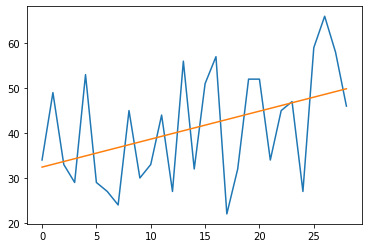

In [37]:
from_ = 40
n_days_over_30_year = np.array(fileout[:,0,0])
print(fileout.shape)
print("")
print(n_days_over_30_year.shape)
print(len(n_days_over_30_year))
from scipy import stats
x = np.arange(len(n_days_over_30_year[from_:]))
model = LinearRegression()
slope, intercept, r_value, p_value, std_err  = stats.linregress(x,n_days_over_30_year[from_:])
print(slope)
ax1 = plt.plot(x,n_days_over_30_year[from_:])
regr = intercept + x*slope
ax2 = plt.plot(x, regr)
R = r_value**2
print("R^2 =",R)

Contar el numero de veces que durante 3 dias seguidos la temperatura media en españa ha superado 30 grados